In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

import os

In [2]:
path = os.path.join('..','data','testing_with_predicted.csv')
data = pd.read_csv(path)

path = os.path.join('..','data','train_data_v2.csv')
train_data = pd.read_csv(path)

In [3]:
data.head()

,Unnamed: 0,q1,q2,true,predicted
0,0,How do I prepare for Aiims without coaching?,How do I prepare AIIMS 2017 without coaching?,1,0.861634
1,1,Why cant we create artificial soul in order to...,Flipkart s valuation was downgraded so explain...,0,0.007158
2,2,Who are your top three favorite Quorans?,Who are some of your favorite Quorans?,1,0.986731
3,3,Is there any chance of World War III?,How soon is world war III?,1,0.999477
4,4,What is the total length and width of plot or ...,How do I open a petrol pump in India?,0,0.000042


In [4]:
train, test = train_test_split(train_data, test_size=0.33, random_state=42)

/home/zenbook/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


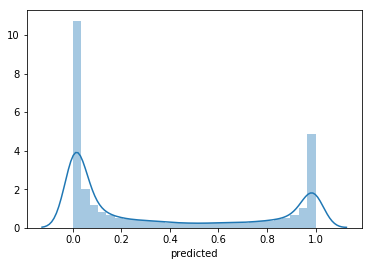

In [5]:
sns.distplot(data.predicted, hist=True)

In [6]:
data['true_predicted'] = data.predicted.apply(lambda x: int(x > 0.5))

In [15]:
positives = data[data.true == data.true_predicted]
negatives = data[data.true != data.true_predicted]


In [43]:

t_train = Tokenizer()
t_train.fit_on_texts(train.question1.values + train.question2.values)

t_pos = Tokenizer()
t_pos.fit_on_texts(positives.q1.values + positives.q2.values)

t_neg = Tokenizer()
t_neg.fit_on_texts(negatives.q1.values + negatives.q2.values)

In [49]:
pos = 0
neg = 0

for word, idx in t_pos.word_index.items():
    if word in t_train.word_index:
        pos += 1
        
for word, idx in t_neg.word_index.items():
    if word in t_train.word_index:
        neg += 1

print("{}% of the words in the positives outcomes are in the training set".format(100*pos/len(t_pos.word_index)))
print("{}% of the words in the negatives outcomes are in the training set".format(100*neg/len(t_neg.word_index)))

73.04203933725728% of the words in the positives outcomes are in the training set
87.44611229418791% of the words in the negatives outcomes are in the training set


In [50]:
negatives.head()

,Unnamed: 0,q1,q2,true,predicted,true_predicted
7,7,How does it feel when the teacher asks one to ...,How it feels when teacher ask to leave the cla...,1,0.045674,0
8,8,Is it possible to get pregnant a day after my ...,Is it possible to get your periods while you a...,0,0.807570,1
11,11,What should I do for my career growth?,What should I do for career growth?,0,0.742752,1
12,12,Cricket (sport): Which are the worst sledging ...,What are some of the best (or worst) instances...,1,0.169124,0
14,14,How can I make money on WhatsApp?,How can I make money on WhatsApp or by WhatsApp?,1,0.177585,0


In [7]:
data['score'] = data.apply(lambda x: abs(x.true-x.predicted), axis=1)

In [9]:
data.sort_values(by=['score'], ascending=False).head()

,Unnamed: 0,q1,q2,true,predicted,true_predicted,score
96611,96611,Website traffic analytics will show statistics...,Website traffic analytics will show statistics...,1,2.164178e-07,0,1.000000
94235,94235,What are some major social faux pas to avoid w...,What are some cultural faux pas in Spain?,1,6.813246e-07,0,0.999999
49441,49441,"As universe expands without limit, dark/vacuum...",If dark/vacuum energy is created with expansio...,0,9.999988e-01,1,0.999999
71270,71270,When my GF's mom or sister or friends get angr...,When my girlfriends mom and sister get angry w...,1,1.302409e-06,0,0.999999
60799,60799,"After the ban of ₹500 and ₹1000 notes, what sh...",What will black money owners do after the bann...,0,9.999983e-01,1,0.999998


In [19]:
negatives[(negatives.predicted>= 0.4) & (negatives.predicted <= 0.6)]

,Unnamed: 0,q1,q2,true,predicted,true_predicted,score
74,74,When did the taboo of incest first appear in h...,What are the best examples of taboo breaking?,0,0.542749,1,0.542749
119,119,Which is your best candid photo?,Which is the best free stock photo website?,0,0.553974,1,0.553974
171,171,How can I know that she (my best friend) loves...,How can I know that he (my best friend) loves ...,1,0.435578,0,0.564422
176,176,How can I get along with my boyfriend?,How can we all get along?,0,0.500084,1,0.500084
212,212,Why are young men nowadays obsessed with going...,What is the best workout for men?,0,0.597616,1,0.597616
238,238,Why are there holes all over the grassy areas ...,What are some cute-looking but fierce wild ani...,0,0.508749,1,0.508749
321,321,What is the best institute for VLSI training i...,What are some good VLSI training institutes in...,1,0.445085,0,0.554915
377,377,How are .exe files created? And what programmi...,What programming language was used to create S...,0,0.508269,1,0.508269
560,560,What are Some mind blowing Electric Scooters T...,What are the best electric scooters 2016?,1,0.487339,0,0.512661
644,644,When do the Navy recruitment visit colleges to...,When do the Indian Navy recruitment visit coll...,0,0.597670,1,0.597670


In [18]:
2544/81100

0.03136868064118373

In [25]:
from keras.preprocessing.text import Tokenizer

docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!']

docs2 = ['Hello how are you', 'Bad work']
# create the tokenizer
t = Tokenizer(oov_token='UNK')
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was lear

In [26]:
t.texts_to_sequences(docs)

[[3, 4], [5, 2], [6, 7], [8, 2], [9]]

In [27]:
t.texts_to_sequences(docs2)

[[1, 1, 1, 1], [1, 2]]